In [1]:
import pandas as pd                    
import numpy as np  
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.decomposition import PCA

In [2]:
dfpca = pd.read_csv(r"https://raw.githubusercontent.com/medinaltbx/G6_DP3/master/data/input/merged_data/train/merged_train.csv", sep=';' , decimal='.')
dfpca.head()


,customerid,edad,loannumber,loanamount,totaldue,termdays,referredby,good_bad_flag,times_loaned,times_late,...,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_UNKNOWN,employment_status_clients_Unemployed,level_of_education_clients_Graduate,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary,level_of_education_clients_UNKNOWN
0,8a858e135cb22031015cbafc76964ebd,48,2,10000.0,13000.0,30,1,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1
1,8a858e275c7ea5ec015c82482d7c3996,36,2,10000.0,13000.0,30,0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,8a858e5b5bd99460015bdc95cd485634,35,4,10000.0,13000.0,30,0,1.0,3.0,2.0,...,0,0,0,1,0,0,0,0,0,1
3,8a858efd5ca70688015cabd1f1e94b55,30,2,10000.0,11500.0,15,0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,8a858ea05a859123015a8892914d15b7,31,6,20000.0,24500.0,30,0,1.0,5.0,2.0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
X = dfpca.drop(columns=['good_bad_flag'] + ['customerid'])
y = dfpca['good_bad_flag']



In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)


In [5]:
#here we want to check wether mean tends to 0 and variance =1

print(np.mean(X))
print(np.var(X))


-1.148902568432962e-17
0.9610389610389612


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [7]:
print(np.mean(X_train))
print(np.var(X_train))

-0.00045200702135016907
0.9510630498568969


PCA WITH ALL FEATURES

In [8]:
#PCA with all features


pca = PCA()
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)

In [9]:
#returns the variance caused by each of the principal components.
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[8.26186412e-02 3.42717383e-02 2.50381016e-02 2.43538143e-02
 2.23724570e-02 2.05833631e-02 2.02278259e-02 1.97644643e-02
 1.89365046e-02 1.85247347e-02 1.84117506e-02 1.81865138e-02
 1.80471785e-02 1.77354136e-02 1.76278123e-02 1.75045405e-02
 1.74114241e-02 1.72840553e-02 1.71979427e-02 1.71564252e-02
 1.71024024e-02 1.70907977e-02 1.70805386e-02 1.70803132e-02
 1.70793554e-02 1.70792956e-02 1.70792865e-02 1.70792865e-02
 1.70733780e-02 1.69566886e-02 1.67248969e-02 1.66792260e-02
 1.62145986e-02 1.53765193e-02 1.50302817e-02 1.49174417e-02
 1.47391544e-02 1.44308502e-02 1.43309282e-02 1.42341184e-02
 1.38933163e-02 1.38043366e-02 1.35556144e-02 1.33678058e-02
 1.31045492e-02 1.26931202e-02 1.25815004e-02 1.23021413e-02
 1.20816674e-02 1.16688942e-02 1.14294044e-02 1.13601930e-02
 1.06674862e-02 1.01624960e-02 1.00074767e-02 9.60474239e-03
 9.27370923e-03 6.87531269e-03 2.69477654e-03 2.21324151e-03
 2.30878964e-05 1.06824393e-06 1.90071806e-32 5.69401356e-33
 3.09850104e-33 2.409969

Text(0, 0.5, 'Explained variance (%)')

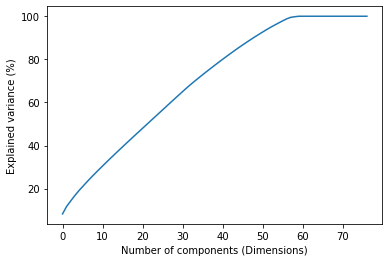

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

The first component alone captures about 8% variability in the data and the second one captures about 3,5% variability in the data and so on. We have to fet above 50 components to achieve 80% variability in the data.

Apply Random forest with all features:


In [11]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train1, y_train)

# Predicting the Test set results
y_pred1 = classifier.predict(X_test1)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred1)
print(cm)
print(accuracy_score(y_test, y_pred1))

[[  0 143]
 [  0 513]]
0.7820121951219512


PCA - 50 **components**:

In [12]:
pca1 = PCA(n_components=50)
X_train2 = pca1.fit_transform(X_train)
X_test2 = pca1.transform(X_test)


In [13]:
explained_variance2 = pca1.explained_variance_ratio_
print(explained_variance2)

[0.08261864 0.03427174 0.0250381  0.02435381 0.02237246 0.02058336
 0.02022783 0.01976446 0.0189365  0.01852473 0.01841175 0.01818651
 0.01804718 0.01773541 0.01762781 0.01750454 0.01741142 0.01728406
 0.01719794 0.01715643 0.0171024  0.0170908  0.01708054 0.01708031
 0.01707936 0.0170793  0.01707929 0.01707929 0.01707338 0.01695669
 0.0167249  0.01667923 0.0162146  0.01537652 0.01503028 0.01491744
 0.01473915 0.01443085 0.01433093 0.01423412 0.01389332 0.01380434
 0.01355561 0.01336781 0.01310455 0.01269312 0.0125815  0.01230214
 0.01208167 0.01166889]


In [14]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train2, y_train)

# Predicting the Test set results
y_pred2 = classifier.predict(X_test2)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred2)
print(cm)
print(accuracy_score(y_test, y_pred2))

[[  0 143]
 [  0 513]]
0.7820121951219512


PCA - 10 component:

In [15]:
pca2 = PCA(n_components=10)
X_train3 = pca2.fit_transform(X_train)
X_test3 = pca2.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train3, y_train)

# Predicting the Test set results
y_pred3 = classifier.predict(X_test3)


cm = confusion_matrix(y_test, y_pred3)
print(cm)
print(accuracy_score(y_test, y_pred3))

[[  0 143]
 [  0 513]]
0.7820121951219512


In [16]:
X_train3 = pd.DataFrame(X_train3)
X_train3

,0,1,2,3,4,5,6,7,8,9
0,-1.585511,0.078097,-0.170172,-0.880154,-0.026918,-0.713417,0.930630,-0.050124,0.218827,0.176147
1,-2.101978,0.161660,0.085662,-1.214273,0.477404,-0.777683,0.802930,-0.235625,0.296684,-0.058316
2,-0.934017,-0.142729,-0.381695,-0.728519,-0.384309,-0.974595,0.726966,-0.170262,0.184895,-0.182865
3,2.129266,-1.248712,0.729079,0.063603,-2.034496,-0.740141,-1.987940,0.683781,0.169073,-3.260698
4,3.753720,-1.062702,-1.109433,-0.095756,-0.236141,-0.908387,0.830394,-0.181006,0.321829,0.074648
...,...,...,...,...,...,...,...,...,...,...
2616,4.870750,0.639538,2.089101,0.102857,2.600607,-0.548304,0.369396,-0.408570,0.003852,0.455450
2617,-1.708827,0.133957,-0.423984,-1.172373,0.016233,1.025810,0.506058,-0.074991,-0.022358,0.563183
2618,-2.348214,0.143070,-1.079531,1.181415,1.149116,-1.013156,0.611390,-0.285827,0.122208,-0.329410
2619,6.185775,0.358648,1.338921,1.076608,0.744949,0.209743,-0.914314,-0.331030,-1.777106,0.519065


<AxesSubplot:>

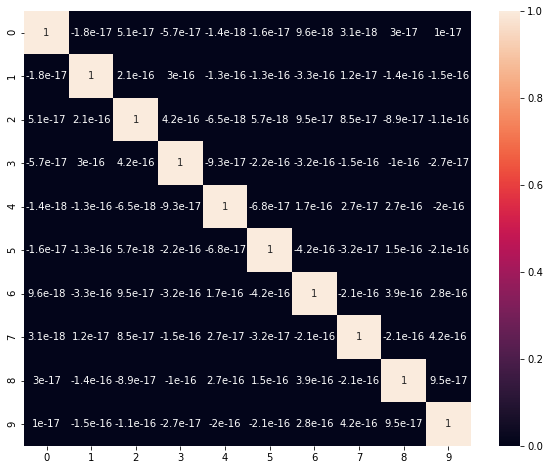

In [17]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_train3.corr(), 
            annot=True)


We can see there is no correlation betweern features

*Logistic Regression*

In [18]:


from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)



In [19]:
# Train the model
clf.fit(X_train1, y_train)


LogisticRegression(max_iter=2500)

In [20]:

# Make predictions
y_pred = clf.predict(X_test1) # Predictions
y_true = y_test # True values



In [21]:
# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 clf.predict(X_train1)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred1), 2))

Train accuracy: 0.79
Test accuracy: 0.78



Test confusion_matrix


Text(114.0, 0.5, 'True')

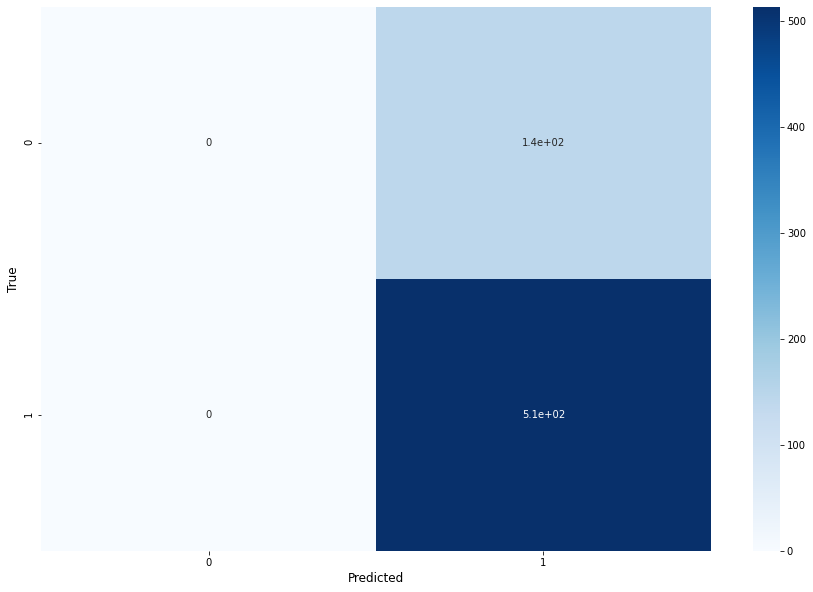

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))

cf_matrix = confusion_matrix(y_true, y_pred1)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

# Exportamos ambos dataset transformados

In [34]:
from sklearn.preprocessing import MinMaxScaler

train = pd.read_csv(r"https://raw.githubusercontent.com/medinaltbx/G6_DP3/master/data/input/merged_data/train/merged_train.csv", sep=';')
test = pd.read_csv(r"https://raw.githubusercontent.com/medinaltbx/G6_DP3/master/data/input/merged_data/test/merged_test.csv", sep=';')

train, target_train = train.drop(columns=['good_bad_flag'] + ['customerid']), train["good_bad_flag"]
test = test.drop(columns=['customerid'],axis=1)

pca10 = PCA(n_components=50)
train = pd.DataFrame(pca10.fit_transform(train))
test = pd.DataFrame(pca10.transform(test))

sc = MinMaxScaler()
train = pd.DataFrame(sc.fit_transform(train))
test = pd.DataFrame(sc.transform(test))


train["good_bad_flag"] = target_train

print(train)
print(test)

train.to_csv("pca_train.csv",sep=';', encoding = 'utf8',index= False)
test.to_csv("pca_test.csv",sep=';', encoding = 'utf8',index= False)

             0         1         2         3         4         5         6  \
0     0.029099  0.391901  0.681459  0.304423  0.292165  0.511460  0.201800   
1     0.029099  0.391902  0.409879  0.242791  0.302773  0.455490  0.044981   
2     0.029099  0.391902  0.385268  0.241612  0.405786  0.468619  0.061877   
3     0.014549  0.547583  0.312486  0.096819  0.287125  0.451900  0.036668   
4     0.227935  0.351634  0.342420  0.044905  0.383895  0.503560  0.065978   
...        ...       ...       ...       ...       ...       ...       ...   
3272  0.014549  0.547583  0.514971  0.145255  0.322048  0.545248  0.033048   
3273  0.014549  0.547583  0.447174  0.129698  0.334527  0.486074  0.037944   
3274  0.591658  0.634306  0.482312  0.164169  0.294929  0.470760  0.062855   
3275  0.227935  0.351634  0.454141  0.073147  0.449312  0.479268  0.045496   
3276  0.014549  0.547583  0.516308  0.143004  0.275217  0.508148  0.199044   

             7         8         9  ...        41        42    

FileNotFoundError: [Errno 2] No such file or directory: 'work/data/pca_train.csv'